In [ ]:
from xopen import xopen
import numpy as np
import json
from tqdm import tqdm
from transformers import T5TokenizerFast
import matplotlib.pyplot as plt
from transformers import T5Tokenizer
import numpy as np
import tiktoken
from IPython.core.display import display, HTML
from matplotlib.colors import LinearSegmentedColormap
tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")
t5_tok = T5TokenizerFast.from_pretrained("t5-base")

In [ ]:
with open('token_scores/base_token_scores_list_nq_dpr_dev_20_oneContextFalse.pkl', 'rb') as f:
    token_scores = np.load(f, allow_pickle=True)
with open('token_scores/base_token_scores_list_nq_dpr_dev_20_ours.pkl', 'rb') as f:
    token_scores_ours = np.load(f, allow_pickle=True)
with open('../eun_FiD/open_domain_data/nq/dev.json') as f:
    dev = json.load(f)
    

In [ ]:
with open('../eun_FiD/open_domain_data/nq/test_oracle.json') as f:
    test_oracle = json.load(f)

In [ ]:
with open('token_scores/base_token_scores_list_nq_test_oracle_20_ours.pkl', 'rb') as f:
    token_scores_ours_oracle = np.load(f, allow_pickle=True)

In [ ]:
for i in tqdm(range(len(token_scores))):
    if not (token_scores[i][1][0][10][:20] == token_scores_ours[i][1][0][10][:20]).sum():
        print(i)
        # break

In [ ]:
qas_i = 0
batch_token_scores, batch_tokens_ids = token_scores_ours[qas_i]
len(batch_token_scores)

len(batch_token_scores)

In [ ]:
len(passage_tokens), len(np.array(passage_scores)[:len(passage_tokens)])

In [ ]:

# Flatten the scores to get min and max
# all_scores = [score for sublist in batch_token_scores for score in sublist]
# min_score = min(all_scores)
# max_score = max(all_scores)

# Custom color map including white for low scores
# colors = ["#FFFFFF", "#E8A0BF", "#BA90C6", "#C0DBEA"]

# Function to map scores to colors
def score_to_color(score, min_score, max_score, cmap):
    norm_score = (score - min_score) / (max_score - min_score)  # Normalize score to 0-1
    color = cmap(norm_score, bytes=True)  # Using the custom colormap
    return f'rgba({color[0]}, {color[1]}, {color[2]}, {color[3] / 255})'  # Convert to rgba string

In [ ]:
indices_looking_for = []
for qas_i in range(2655):
    batch_token_scores, batch_tokens_ids = token_scores_ours_oracle[qas_i]
    if len(batch_token_scores[0]) < 130 and len(batch_token_scores[0]) > 100 and batch_token_scores[0][0] < np.mean(batch_token_scores):
        indices_looking_for.append(qas_i)
print(len(indices_looking_for))

In [ ]:
from src.compress_utils import *

In [ ]:
for scores in batch_token_scores:
    break
print(scores)

In [ ]:
indices_looking_for = []
for qas_i in range(len(dev)):
    batch_token_scores, batch_tokens_ids = token_scores_ours[qas_i]
    ctx_scores = get_ctx_scores(np.array(batch_token_scores), 'mean', 'include', False, t5_tok, "", "", "")
    first_i = np.argmax(ctx_scores)
    second_i = np.argmin(ctx_scores)
    qas = dev[qas_i]
    if qas['ctxs'][first_i]['has_answer'] and not qas['ctxs'][second_i]['has_answer']:
        if np.where(batch_tokens_ids[0][first_i] == 1)[0] < 140 and np.where(batch_tokens_ids[0][first_i] == 1)[0] > 70:
            if np.where(batch_tokens_ids[0][second_i] == 1)[0] < 140 and np.where(batch_tokens_ids[0][second_i] == 1)[0] > 70:
                indices_looking_for.append((qas_i, first_i, second_i))
print(len(indices_looking_for))

In [ ]:
t5_tok.encode('context: ')

In [ ]:
qas_i, first_i, second_i = indices_looking_for[0]
qas = dev[qas_i]
print(qas_i)
batch_token_scores, batch_tokens_ids = token_scores_ours[qas_i]

decoded_tokens = []
passage_lens = []
for passage in batch_tokens_ids[0]:  # Skip the batch dimension
    # start_token_index = np.where(passage == 2233)[0][0]
    start_token_index = np.where(passage == 2625)[0][0] + 2 ## 2625: context

    len_passage = np.where(passage == 1)[0][0]
    passage_lens.append(len_passage)
    passage = passage[start_token_index:len_passage]
    decoded_passage = t5_tok.decode(passage, skip_special_tokens=True)
    decoded_tokens.append(decoded_passage.split())

colors = ["#FFFFFF", "#BA68C8"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

passage_tokens_list = [decoded_tokens[first_i], decoded_tokens[second_i]]
passage_scores_list = [passage_score[start_token_index:passage_lens[p_i]] for p_i, passage_score in enumerate(batch_token_scores) if p_i in set([first_i, second_i])]

# Create the HTML visualization for a single passage

html_content = '<div style="font-family: \'Times New Roman\'; line-height: 1.4; background-color: white; padding: 5px;">'
min_score = np.concatenate(passage_scores_list).min()
max_score = np.concatenate(passage_scores_list).max()
passage_scores_norm =  np.log1p(np.concatenate(passage_scores_list) - min_score)
min_score = passage_scores_norm.min()
passage_scores_norm =  np.log1p(passage_scores_norm - min_score)
min_score = passage_scores_norm.min()
max_score = passage_scores_norm.max()
passage_scores_norm =  np.log1p(passage_scores_norm - min_score)
min_score = passage_scores_norm.min()
max_score = passage_scores_norm.max()
passage_scores_norm =  np.log1p(passage_scores_norm - min_score)
min_score = passage_scores_norm.min()
max_score = passage_scores_norm.max()
passage_scores_norm =  np.log1p(passage_scores_norm - min_score)
min_score = passage_scores_norm.min()
max_score = passage_scores_norm.max()
passage_scores_norm =  np.log1p(passage_scores_norm - min_score)
min_score = passage_scores_norm.min()
max_score = passage_scores_norm.max()
passage_scores_norm =  np.log1p(passage_scores_norm - min_score)
min_score = passage_scores_norm.min()
max_score = passage_scores_norm.max()
passage_scores_norm =  np.log1p(passage_scores_norm - min_score)
min_score = passage_scores_norm.min()
max_score = passage_scores_norm.max()


passage_scores_list = [passage_scores_norm[:passage_lens[first_i]], passage_scores_norm[passage_lens[first_i]:]]


# passage_scores = [np.log1p(score - min_score) for score in passage_scores]
# Prepare HTML content with highlighting
for passage_tokens, passage_scores in zip(passage_tokens_list, passage_scores_list):
    for token, score in zip(passage_tokens, passage_scores):
        color = score_to_color(np.array(score), min_score, max_score, cmap)
        # html_content += f'<span style="background-color: {color}; padding: 1px 2px; margin: 1px; border-radius: 2px;">{token}</span> '
        html_content += f'<span style="background-color: {color}; color: black; padding: 1px 2px; margin: 0.3px; border-radius: 2px;">{token}</span> '
    html_content += '</br>'
html_content += '</div>'

# Display the HTML
print(qas['question'], qas['answers'])
display(HTML(html_content))

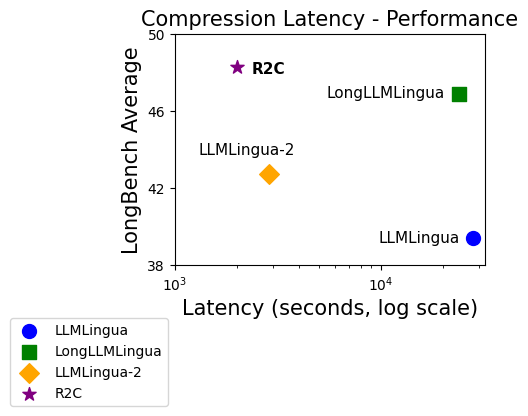

In [ ]:
color = score_to_color(score, min_score, max_score)
for c in color:
    print(c, end='/')

In [ ]:
qas_i = 10
batch_token_scores, batch_tokens_ids = token_scores_ours_oracle[qas_i]

decoded_tokens = []
for passage in batch_tokens_ids[0]:  # Skip the batch dimension
    decoded_passage = t5_tok.decode(passage, skip_special_tokens=True)
    decoded_tokens.append(decoded_passage.split())
# Custom color map from white to a vivid version of #BA90C6
colors = ["#FFFFFF", "#BA68C8"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Function to map transformed scores to colors
def score_to_color_v2(score, min_score, max_score):
    norm_score = (score - min_score) / (max_score - min_score)  # Normalize score to 0-1
    color = cmap(norm_score)  # Using the custom colormap
    return color  # Return normalized rgba values

# Create the visualization for a single passage
passage_tokens = decoded_tokens[0]
passage_scores = [np.log1p(score - min_score) for score in batch_token_scores[0]]
min_score = min(all_scores)
max_score = max(all_scores)
fig, ax = plt.subplots(figsize=(20, 10))
x, y = 0, 1
line_height = 1.2
min_score = min(passage_scores)
max_score = max(passage_scores)
for token, score in zip(passage_tokens, passage_scores):
    color = score_to_color_v2(score, min_score, max_score)
    ax.text(x, y, token, fontsize=12, bbox=dict(facecolor=color, edgecolor=color, alpha=0.5, boxstyle="round,pad=0.3"))
    x += len(token) * 0.05  # Adjust the spacing between words
    if x > 15:  # Move to the next line if the current line is too long
        x = 0
        y -= line_height

ax.axis('off')  # Hide axes

# Save the figure as a high-resolution PNG file
plt.savefig('output.png', dpi=5, bbox_inches='tight')
plt.show()

In [ ]:
min_score, max_score

In [ ]:
#!/usr/bin/env python3
import string
from typing import List

import regex


def normalize_answer(s: str) -> str:
    """Normalization from the SQuAD evaluation script.

    See https://worksheets.codalab.org/rest/bundles/0x6b567e1cf2e041ec80d7098f031c5c9e/contents/blob/
    """

    def remove_articles(text):
        return regex.sub(r"\b(a|an|the)\b", " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))


def best_subspan_em(prediction: str, ground_truths: List[str]) -> float:
    normalized_prediction = normalize_answer(prediction)

    for ground_truth in ground_truths:
        normalized_ground_truth = normalize_answer(ground_truth)
        if normalized_ground_truth.lower() in normalized_prediction.lower():
            return 1.0
    return 0.0


In [ ]:
compressed = []
with open('qa_data/nq-open-oracle-compressed_60.jsonl') as f:
    for line in f:
        compressed.append(json.loads(line))

with xopen('qa_data/nq-open-oracle_60.jsonl.gz', 'w') as f:
    for line in tqdm(compressed):
        f.write(json.dumps(line) + '\n')

In [ ]:
compressed_200 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_200.jsonl.gz') as f:
    for line in f:
        compressed_200.append(json.loads(line))

compressed_190 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_190.jsonl.gz') as f:
    for line in f:
        compressed_190.append(json.loads(line))

compressed_180 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_180.jsonl.gz') as f:
    for line in f:
        compressed_180.append(json.loads(line))

compressed_170 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_170.jsonl.gz') as f:
    for line in f:
        compressed_170.append(json.loads(line))
        
compressed_160 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_160.jsonl.gz') as f:
    for line in f:
        compressed_160.append(json.loads(line))

compressed_150 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_150.jsonl.gz') as f:
    for line in f:
        compressed_150.append(json.loads(line))
        
compressed_140 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_140.jsonl.gz') as f:
    for line in f:
        compressed_140.append(json.loads(line))

compressed_130 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_130.jsonl.gz') as f:
    for line in f:
        compressed_130.append(json.loads(line))

compressed_120 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_120.jsonl.gz') as f:
    for line in f:
        compressed_120.append(json.loads(line))

compressed_100 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_100.jsonl.gz') as f:
    for line in f:
        compressed_100.append(json.loads(line))

compressed_80 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_80.jsonl.gz') as f:
    for line in f:
        compressed_80.append(json.loads(line))

compressed_60 = []
with xopen('qa_data/oracle_comp/nq-open-oracle-compressed_60.jsonl.gz') as f:
    for line in f:
        compressed_60.append(json.loads(line))

oracle = []
with xopen('qa_data/nq-open-oracle.jsonl.gz') as f:
    for line in f:
        oracle.append(json.loads(line))

In [ ]:
compressed_80[0]

In [ ]:
fid_4 = []
with xopen('qa_data/nq-open-oracle_fid_0.4.jsonl.gz') as f:
    for line in f:
        fid_4.append(json.loads(line))

fid_5 = []
with xopen('qa_data/nq-open-oracle_fid_0.5.jsonl.gz') as f:
    for line in f:
        fid_5.append(json.loads(line))

fid_6 = []
with xopen('qa_data/nq-open-oracle_fid_0.6.jsonl.gz') as f:
    for line in f:
        fid_6.append(json.loads(line))

fid_7 = []
with xopen('qa_data/nq-open-oracle_fid_0.7.jsonl.gz') as f:
    for line in f:
        fid_7.append(json.loads(line))

fid_8 = []
with xopen('qa_data/nq-open-oracle_fid_0.8.jsonl.gz') as f:
    for line in f:
        fid_8.append(json.loads(line))

fid_9 = []
with xopen('qa_data/nq-open-oracle_fid_0.9.jsonl.gz') as f:
    for line in f:
        fid_9.append(json.loads(line))


In [ ]:
fid_9 = []
with xopen('qa_data/nq-open-oracle_fid_0.9_new.jsonl.gz') as f:
    for line in f:
        fid_9.append(json.loads(line))


In [ ]:
compressed_tfidf100 = []
with xopen('qa_data/nq-open-oracle-compressed-tfidf-1.0.jsonl.gz') as f:
    for line in f:
        compressed_tfidf100.append(json.loads(line))

compressed_tfidf50 = []
with xopen('qa_data/nq-open-oracle-compressed-tfidf-0.5.jsonl.gz') as f:
    for line in f:
        compressed_tfidf50.append(json.loads(line))

compressed_tfidf20 = []
with xopen('qa_data/nq-open-oracle-compressed-tfidf-0.2.jsonl.gz') as f:
    for line in f:
        compressed_tfidf20.append(json.loads(line))

compressed_tfidf10 = []
with xopen('qa_data/nq-open-oracle-compressed-tfidf-0.1.jsonl.gz') as f:
    for line in f:
        compressed_tfidf10.append(json.loads(line))

compressed_tfidf5 = []
with xopen('qa_data/nq-open-oracle-compressed-tfidf-0.05.jsonl.gz') as f:
    for line in f:
        compressed_tfidf5.append(json.loads(line))


In [ ]:
llama_preds_closed = []
with xopen('qa_predictions/nq-open-oracle-Llama-2-13b-chat-hf-closedbook-predictions.jsonl.gz') as f:
    for line in f:
        llama_preds_closed.append(json.loads(line))

llama_preds = []
with xopen('qa_predictions/nq-open-oracle-llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    for line in f:
        llama_preds.append(json.loads(line))
        
llama_preds_comp_100 = []
with xopen('qa_predictions/nq-open-oracle-compressed-100-Llama-2-13b-chat-hf-predictions.jsonl.gz_2') as f:
    for line in f:
        llama_preds_comp_100.append(json.loads(line))
        
# cnt = 0
# correct_list = []
# correct_compt_list = []
qas_indices = []
# org_ctx_len = []
# comp_ctx_len = []
# equal_prompt_diff_ans = []
for qas_i, (qas, qas_compressed) in enumerate(tqdm(zip(llama_preds, llama_preds_comp_100))):
    pos_ctx = qas['model_prompt'].split('\n\n')[2]
    comp_pos_ctx = qas_compressed['compressed_prompt'].split('\n\n')[1]
    if pos_ctx == comp_pos_ctx:
        pass
    else:
        qas_indices.append(qas_i)

In [ ]:
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_llamactx_fidtoken_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    preds1 = [json.loads(line) for line in f]
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_gold_at_0_6xcomp_v2-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    preds2 = [json.loads(line) for line in f]

In [ ]:
print(preds1[1]['model_answer'])

In [ ]:
print(preds2[1]['model_answer'])

In [ ]:
cnt = 0
qas_i_list = []
for qas_i, (qas, qas_compressed) in enumerate(tqdm(zip(oracle, compressed_200))):
    a = "Document [1](Title: " + qas['ctxs'][0]['title'] + ") " + qas['ctxs'][0]['text']
    b = qas_compressed['compressed_prompt'].split('\n\n')[1]
    if a != b:
        # if qas_i not in qas_i_list:
        #     print("qas_i:", qas_i)
        qas_i_list.append(qas_i)
    cnt += a==b
print(cnt)
print(len(qas_i_list))
qas_i_set = set(qas_i_list)

In [ ]:
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_llamactx_fidtoken_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    preds1 = [json.loads(line) for line in f]
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_gold_at_9_6xcomp_contextonly-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    preds2 = [json.loads(line) for line in f]

In [ ]:
print(preds1[0]['model_prompt'])

In [ ]:
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_gold_at_0_6xcomp_contextonly_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f: ## 53.069679849340865
    preds1 = [json.loads(line) for line in f]
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_rev_gold_at_0_6xcomp_contextonly_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f: ## 53.069679849340865
    preds2 = [json.loads(line) for line in f]
    
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_llamactx_fidtoken_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f: ## 53.258003766478346
    preds3 = [json.loads(line) for line in f]
with xopen('qa_predictions/20_total_documents/nq-open-20_total_documents_rev_llamactx_fidtoken_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f: ## 52.73069679849341
    preds4 = [json.loads(line) for line in f]
    

In [ ]:
53.069679849340865
53.069679849340865
53.258003766478346

In [ ]:
python -u scripts/evaluate_qa_responses.py --input-path qa_predictions/20_total_documents/nq-open-20_total_documents_gold_at_0_6xcomp_contextonly_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz &&
python -u scripts/evaluate_qa_responses.py --input-path qa_predictions/20_total_documents/nq-open-20_total_documents_rev_gold_at_0_6xcomp_contextonly_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz &&
python -u scripts/evaluate_qa_responses.py --input-path qa_predictions/20_total_documents/nq-open-20_total_documents_llamactx_fidtoken_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz &&
python -u scripts/evaluate_qa_responses.py --input-path qa_predictions/20_total_documents/nq-open-20_total_documents_rev_llamactx_fidtoken_1.0_itself_orgidx-Llama-2-13b-chat-hf-predictions.jsonl.gz

In [ ]:
## Processing qa_data

# compressed_list = [compressed_tfidf100, compressed_tfidf50, compressed_tfidf20, compressed_tfidf10, compressed_tfidf5]
# compressed_list = [compressed_200, compressed_190, compressed_180, compressed_170, compressed_160, compressed_150, compressed_140, compressed_130, compressed_120, compressed_100, compressed_80, compressed_60]
# compressed_list = [fid_4, fid_5, fid_6, fid_7, fid_8, fid_9]
compressed_list = [fid_9]
for compressed in compressed_list:
    org_ctx_len = []
    comp_ctx_len = []
    ha_cnt_org, ha_cnt_comp = 0, 0
    for qas_i, qas_comp in enumerate(tqdm(compressed)):
        # if qas_i not in eval_indices:
            # continue
        pos_ctx = qas_comp['ctxs'][0]['text']
        comp_pos_ctx = qas_comp['ctxs'][0]['compressed_text']
        # comp_pos_ctx = qas_comp['compressed_prompt'].split('\n\n')[1]
        org_ctx_len.append(len(tokenizer.encode(pos_ctx)))
        comp_ctx_len.append(len(tokenizer.encode(comp_pos_ctx)))
        ## check if compressed ctx has the answer
        ha_cnt_org += best_subspan_em(pos_ctx, qas_comp['answers'])
        ha_cnt_comp += best_subspan_em(comp_pos_ctx, qas_comp['answers'])
    print(np.mean(org_ctx_len), np.mean(comp_ctx_len))
    print(f"compress rate: {1 / (np.mean(org_ctx_len)/np.mean(comp_ctx_len)):.2f}x")

In [ ]:
for lamb in tqdm([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]):
    lamb_name = str(lamb).replace('.', '')
    exec(f'preds_fid_{lamb_name} = []')
    with xopen(f'qa_predictions/nq-open-oracle-fid-{lamb}_new-longchat-13b-16k-predictions.jsonl.gz') as f:
        for line in f:
            exec(f'preds_fid_{lamb_name}.append(json.loads(line))')

In [ ]:
preds_fid_sent_3 = []
with xopen('qa_predictions/nq-open-oracle-fid_sent_top3-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    for line in f:
        preds_fid_sent_3.append(json.loads(line))

In [ ]:
preds_org = []
with xopen('qa_predictions/nq-open-oracle-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    for qas_i, line in enumerate(f):
        if qas_i in eval_indices:
            preds_org.append(json.loads(line))

In [ ]:
# preds_fid_04_new = preds_fid_04
preds_fid_03_new = preds_fid_03

In [ ]:
for topn in tqdm([3, 2, 1]):
    topn_name = str(topn).replace('.', '')
    exec(f'preds_tfidf_{topn_name} = []')
    with xopen(f'qa_predictions/nq-open-oracle-tfidf_sent_top{topn}-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
        for line in f:
            exec(f'preds_tfidf_{topn_name}.append(json.loads(line))')

In [ ]:
preds_tfidf_3[0]

In [ ]:
preds_20_6x_comp = []
with open('qa_predictiosn/20_total_documents/')

In [ ]:
## Processing qa_predictions
# preds_list = [preds_fid_09, preds_fid_08, preds_fid_07, preds_fid_06, preds_fid_05, preds_fid_04, preds_fid_03, preds_fid_02, preds_fid_01]
# preds_list = [preds_fid_03, preds_fid_03_new, preds_fid_04, preds_fid_04_new]
preds_list = [preds_tfidf_3, preds_tfidf_2, preds_tfidf_1, preds_org]
for preds in preds_list:
    org_ctx_len = []
    comp_ctx_len = []
    em_list = []
    ha_cnt_org = 0
    ha_cnt_comp = 0
    for qas_i, qas_pred in enumerate(tqdm(preds)):
        # if qas_i not in eval_indices:
            # continue
        pos_ctx = qas_pred['ctxs'][0]['text']
        if qas_pred['ctxs'][0].get('compressed_text'):
            comp_pos_ctx = qas_pred['ctxs'][0]['compressed_text']
            comp_ctx_len.append(len(tokenizer.encode(comp_pos_ctx)))
            ha_cnt_comp += best_subspan_em(comp_pos_ctx, qas_pred['answers'])
        # comp_pos_ctx = qas_pred['compressed_prompt'].split('\n\n')[1]
        org_ctx_len.append(len(tokenizer.encode(pos_ctx)))
        model_answer = qas_pred['model_answer']
        # model_answer = qas_pred['model_answer'].split('\n')[0]
        em_list.append(best_subspan_em(model_answer, qas_pred['answers']))
        ## check if compressed ctx has the answer
        ha_cnt_org += best_subspan_em(pos_ctx, qas_pred['answers'])
    print(f"Org. context token length: {np.mean(org_ctx_len):.2f}, compressed: {np.mean(comp_ctx_len):.2f} (compress rate: {1 / (np.mean(org_ctx_len)/np.mean(comp_ctx_len)):.2f}x)")
    print(f"Subspan_em: {100*np.mean(em_list):.2f} (Org. context has answer: {int(ha_cnt_org)}/{len(preds)}, compressed: {int(ha_cnt_comp)}/{len(preds)})")

In [ ]:
best_subspan_em(preds_fid_9[0]['ctxs'][0]['compressed_text'], preds_fid_9[0]['answers'])

In [ ]:
qas_i = 1
print(preds_fid_9[qas_i]['ctxs'][0]['compressed_text'],  preds_fid_9[qas_i]['answers'])
best_subspan_em(preds_fid_9[qas_i]['ctxs'][0]['compressed_text'], preds_fid_9[qas_i]['answers'])

In [ ]:
sorted(list(eval_indices))[1]

In [ ]:
qas_compressed['ctxs'][0]['text'], qas_preds['answers']

In [ ]:
sent_oa_preds_llama = []
# qa_predictions/nq-open-oracle-sent_oa-Llama-2-13b-chat-hf-predictions.jsonl.gz
with xopen('qa_predictions/nq-open-oracle-sent_oa-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    for line in f:
        sent_oa_preds_llama.append(json.loads(line))

sent_oa_preds_longchat = []
# qa_predictions/nq-open-oracle-sent_oa-longchat-13b-16k-predictions.jsonl.gz
with xopen('qa_predictions/nq-open-oracle-sent_oa-longchat-13b-16k-predictions.jsonl.gz') as f:
    for line in f:
        sent_oa_preds_longchat.append(json.loads(line))

sent_oa_preds_llama_upstage = []
# qa_predictions/nq-open-oracle-sent_oa-llama-30b-instruct-predictions.jsonl.gz
with xopen('qa_predictions/nq-open-oracle-sent_oa-llama-30b-instruct-predictions.jsonl.gz') as f:
    for line in f:
        sent_oa_preds_llama_upstage.append(json.loads(line))

In [ ]:
oa_preds_llama = []
# qa_predictions/nq-open-oracle-oa-Llama-2-13b-chat-hf-predictions.jsonl.gz
with xopen('qa_predictions/nq-open-oracle-oa-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    for line in f:
        oa_preds_llama.append(json.loads(line))

In [ ]:
1/8.52

In [ ]:
preds_list = [oa_preds_llama, sent_oa_preds_llama, sent_oa_preds_longchat, sent_oa_preds_llama_upstage]
for preds in preds_list:
    org_ctx_len = []
    comp_ctx_len = []
    for qas_i, qas in enumerate(tqdm(preds)):
        title = qas['ctxs'][0]['title']
        text = qas['ctxs'][0]['text']
        pos_ctx = f"Document [1](Title: {title}) {text}"
        
        title_rm_answers = qas['ctxs'][0]['title_rm_answers']
        text_rm_answers = qas['ctxs'][0]['text_rm_answers']
    
        comp_pos_ctx = f"Document [1](Title: {title_rm_answers}) {text_rm_answers}"
        org_ctx_len.append(len(tokenizer.encode(pos_ctx)))
        comp_ctx_len.append(len(tokenizer.encode(comp_pos_ctx)))
    print(np.mean(org_ctx_len), np.mean(comp_ctx_len))
    print(f"compress rate: {np.mean(org_ctx_len)/np.mean(comp_ctx_len):.2f}x")

In [ ]:
orc_preds = []
with xopen('qa_predictions/nq-open-oracle-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    for line in f:
        orc_preds.append(json.loads(line))

In [ ]:
for comp in [200, 190, 180, 170, 160, 150, 140, 130, 120, 100, 80, 60]:
    exec(f'preds_comp_{comp} = []')
    with xopen(f'qa_predictions/nq-open-oracle-compressed-{comp}-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
        for line in f:
            exec(f'preds_comp_{comp}.append(json.loads(line))')
for tfidf in [1.0, 0.5, 0.2, 0.1, 0.05]:
    name_tfidf = int(tfidf*100)
    exec(f'preds_tfidf_{name_tfidf} = []')
    with xopen(f'qa_predictions/nq-open-oracle-compressed-tfidf-{tfidf}-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
        for line in f:
            exec(f'preds_tfidf_{name_tfidf}.append(json.loads(line))')

# preds_tfidf_100 = []
# with xopen("qa_predictions/nq-open-oracle-compressed-tfidf-1.0-Llama-2-13b-chat-hf-predictions.jsonl.gz") as f:
#     for line in f:
#         preds_tfidf_100.append(json.loads(line))

# preds_tfidf_50 = []
# with xopen("qa_predictions/nq-open-oracle-compressed-tfidf-0.5-Llama-2-13b-chat-hf-predictions.jsonl.gz") as f:
#     for line in f:
#         preds_tfidf_50.append(json.loads(line))

# preds_tfidf_20 = []
# with xopen("qa_predictions/nq-open-oracle-compressed-tfidf-0.2-Llama-2-13b-chat-hf-predictions.jsonl.gz") as f:
#     for line in f:
#         preds_tfidf_20.append(json.loads(line))
        
# preds_tfidf_10 = []
# with xopen("qa_predictions/nq-open-oracle-compressed-tfidf-0.1-Llama-2-13b-chat-hf-predictions.jsonl.gz") as f:
#     for line in f:
#         preds_tfidf_10.append(json.loads(line))

# preds_tfidf_5 = []
# with xopen("qa_predictions/nq-open-oracle-compressed-tfidf-0.05-Llama-2-13b-chat-hf-predictions.jsonl.gz") as f:
#     for line in f:
#         preds_tfidf_5.append(json.loads(line))
        

In [ ]:
from lost_in_the_middle.metrics import best_subspan_em

In [ ]:
preds_list = ["preds_tfidf_5", "preds_tfidf_10", "preds_tfidf_20", "preds_tfidf_50", "preds_tfidf_100"]
for preds_name in preds_list:
    preds = eval(preds_name)
    cnt_1, cnt_2, ans_cnt = 0, 0, 0
    for qas in preds:
        cnt_1 += best_subspan_em(qas['demonstration'], qas['answer'])
        cnt_2 += best_subspan_em(qas['compressed_prompt'], qas['answer'])
        ans_cnt += int(best_subspan_em(qas['model_answer'], qas['answer']))
    # print(cnt_1, len(preds_tfidf_100))
    print(f"{preds_name} {cnt_2}/{len(preds)}", f"{100 * (cnt_2/len(preds)):.2f}% Span EM: {ans_cnt}/{len(preds)}", f"{100 * (ans_cnt/len(preds)):.2f}%")
    

In [ ]:
preds_list = ["orc_preds", "preds_comp_200", "preds_comp_190", "preds_comp_180", "preds_comp_170", "preds_comp_160", "preds_comp_150", "preds_comp_140", "preds_comp_130", "preds_comp_120", "preds_comp_100", "preds_comp_80", "preds_comp_60"]
for preds_name in preds_list:
    preds = eval(preds_name)
    cnt_1, cnt_2, ans_cnt = 0, 0, 0
    cnt_3, cnt_4 = [], []
    
    for qas in preds:
        if qas.get('demonstration') is None:
            qas['demonstration'] = f"Document [1](Title: {qas['ctxs'][0]['title']}) {qas['ctxs'][0]['text']}"
        cnt_1 += int(best_subspan_em(qas['demonstration'], qas['answer'])) ## If answer is in the demo (462 out of 462)
        
        if qas.get('compressed_prompt') is None:
            comp_has_answer = 1
            pass
        else:
            comp_has_answer = int(best_subspan_em(qas['compressed_prompt'], qas['answer']))
            cnt_2 += comp_has_answer
        if comp_has_answer:
            cnt_3.append(int(best_subspan_em(qas['model_answer'], qas['answer'])))
        else:
            cnt_4.append(int(best_subspan_em(qas['model_answer'], qas['answer'])))
            
        ans_cnt += int(best_subspan_em(qas['model_answer'], qas['answer']))
    # print(cnt_1, len(preds_tfidf_100))
    print(f"{preds_name} {cnt_2}/{len(preds)}", f"{100 * (cnt_2/len(preds)):.2f}% Span EM: {ans_cnt}/{len(preds)}", f"{100 * (ans_cnt/len(preds)):.2f}%, {100 * (np.mean(cnt_3)):.2f}% ({len(cnt_3)}), {100 * (np.mean(cnt_4)):.2f}% ({len(cnt_4)})")
    

In [ ]:
with xopen('qa_predictions/nq-open-oracle-rm-longchat-13b-16k-predictions.jsonl.gz') as f:
    qa_preds = [json.loads(line) for line in f]

In [ ]:
indices = []
for idx, qas in enumerate(qa_preds):
    if best_subspan_em(qas['model_answer'], qas['answers']):
        indices.append(idx)

In [ ]:
qa_preds[indices[1]]

In [ ]:
i = 59
if int(best_subspan_em(eval(preds_list[-3])[i]['compressed_prompt'], eval(preds_list[-3])[i]['answer'])):
    print(eval(preds_list[-3])[i]['compressed_prompt'].split('\n\n')[1] == eval(preds_list[-3])[i]['demonstration'])
    print(eval(preds_list[-3])[i]['answer'])
    print(eval(preds_list[-3])[i]['demonstration'])
    print(eval(preds_list[-3])[i]['compressed_prompt'])

In [ ]:
import matplotlib.pyplot as plt

# Convert percentages in A to decimal form for direct comparison
A = [97.90, 96.40, 93.70, 93.70, 93.10, 89.50, 87.50, 85.70, 85.40, 80.60, 75.60, 61.60]

# Given values for B
B = [0.97, 0.96, 0.93, 0.89, 0.85, 0.81, 0.77, 0.74, 0.69, 0.64, 0.6, 0.44]
B_percent = [x * 100 for x in B]  # Convert A from percentages to decimals

X = [94.3, 92.6, 90.1, 87.0, 84.0, 81.3, 78.1, 75.8, 73.5, 67.6, 60.2, 50.0]
# Creating a plot
plt.figure(figsize=(10, 6))
plt.plot(X[::-1], A, label='vs. Oracle', marker='o')
plt.plot(X[::-1], B_percent, label='Recall@1', marker='x')
plt.xlabel('Index')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



In [ ]:
python -u scripts/evaluate_qa_responses.py --input-path qa_predictions/nq-open-oracle-sent_oa-Llama-2-13b-chat-hf-predictions.jsonl.gz &&
python -u scripts/evaluate_qa_responses.py --input-path qa_predictions/nq-open-oracle-sent_oa-longchat-13b-16k-predictions.jsonl.gz &&
python -u scripts/evaluate_qa_responses.py --input-path qa_predictions/nq-open-oracle-sent_oa-llama-30b-instruct-predictions.jsonl.gz

In [ ]:
preds_list = ["preds_tfidf_100", "preds_tfidf_50", "preds_tfidf_20", "preds_tfidf_10", "preds_tfidf_5"]
for preds_name in preds_list:
    preds = eval(preds_name)
    cnt_1 = 0
    cnt_2 = 0
    for qas in preds:
        cnt_1 += int(best_subspan_em(qas['demonstration'], qas['answer']))
        cnt_2 += int(best_subspan_em(qas['compressed_prompt'], qas['answer']))
    # print(cnt_1, len(preds_tfidf_100))
    print(f"{preds_name} {cnt_2}/{len(preds)}", f"{100 * (cnt_2/len(preds)):.2f}%") 

In [ ]:
for preds in [preds_comp_100, preds_comp_50, preds_comp_20, preds_comp_10, preds_comp_5]:
    cnt_1 = 0
    cnt_2 = 0
    for qas in preds:
        cnt_1 += best_subspan_em(qas['demonstration'], qas['answer'])
        cnt_2 += best_subspan_em(qas['compressed_prompt'], qas['answer'])
        
    print(cnt_1, len(preds_tfidf_100))
    print(cnt_2, len(preds_tfidf_100), f"{cnt_2/len(preds_tfidf_100)}") 

In [ ]:
import pickle
print(len(eval_indices))
with open('eval_indices_upstage_llama30b_compressed200.pkl', 'wb') as f:
    pickle.dump(eval_indices, f)

In [ ]:
import pickle
with open('eval_indices_compressed200.pkl', 'rb') as f:
    eval_indices = pickle.load(f)
    print(len(eval_indices))    

In [ ]:
preds = []
with xopen('qa_predictions/nq-open-oracle-llama-30b-instruct-closedbook-predictions.jsonl.gz') as f:
    for line in f:
        preds.append(json.loads(line))
        
em_list = []
closed_correct_indices = set()
for i, d in enumerate(preds):
    # if i not in real_qas_indices:
    #     continue
    model_answer = d['model_answer']
    # model_answer = model_answer.split('\n')[0].strip()
    gold_answers = d['answers']
    correct = best_subspan_em(prediction=model_answer, ground_truths=gold_answers)
    if correct:
        closed_correct_indices.add(i)
    em_list.append(correct)
em_array = np.array(em_list)
print('EM:', em_array.mean() * 100)

In [ ]:
all_indices = set(np.arange(2655).tolist())
eval_indices = (all_indices - closed_correct_indices) & qas_i_set
len(eval_indices)

In [ ]:
# llama_preds_comp_100 = []
# with xopen('qa_predictions/nq-open-oracle-compressed-100-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
#     for line in f:
#         llama_preds_comp_100.append(json.loads(line))

preds = []
# with xopen('qa_predictions/nq-open-oracle-longchat-13b-16k-predictions.jsonl.gz') as f:
with xopen('qa_predictions/nq-open-oracle-compressed-100-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
# with xopen('qa_predictions/nq-open-oracle-Llama-2-13b-chat-hf-predictions.jsonl.gz') as f:
    for line in f:
        preds.append(json.loads(line))
em_list = []
em_list_in_prompt= []
for i, d in enumerate(preds):
    model_answer = d['model_answer']
    # if i in closed_correct_indices:
    #     continue
    # if i not in qas_i_set:
    #     continue
    if i not in eval_indices:
        continue
    # model_answer = model_answer.split('\n')[0].strip()
    gold_answers = d['answer']
    correct = best_subspan_em(prediction=model_answer, ground_truths=gold_answers)
    correct_in_prompt = best_subspan_em(prediction=d['model_prompt'], ground_truths=gold_answers)
    
    em_list.append(correct)
    em_list_in_prompt.append(correct_in_prompt)
    
    if correct and not correct_in_prompt:
        print(i)
        print(d['demonstration'])     
        print(d['model_prompt'])
        print(model_answer)
        print(gold_answers)
        break
em_array = np.array(em_list)
print('EM:', em_array.mean() * 100)
print(f'EM: {em_array.mean() * 100:.1f} / # Questions: {em_array.shape[0]}')

em_array_in_prompt = np.array(em_list_in_prompt)
print('EM:', em_array_in_prompt.mean() * 100)
print(f'EM: {em_array_in_prompt.mean() * 100:.1f} / # Questions: {em_array_in_prompt.shape[0]}')

In [ ]:
# for token_len in [200, 190, 180, 170, 160, 150, 140, 130, 120, 100, 80, 60]:
# for token_len in [200, 180, 160, 140, 120, 100, 80, 60]:

for threshold in [0.5, 0.2, 0.1, 0.05]:
# for token_len in [200, 180, 160, 140, 120, 100, 80, 60]:
    preds = []
    with xopen(f'qa_predictions/nq-open-oracle-compressed-{token_len}-llama-30b-instruct-predictions.jsonl.gz') as f:
        for line in f:
            preds.append(json.loads(line))

    em_list = []
    for i, d in enumerate(preds):
        model_answer = d['model_answer']
        # if i in closed_correct_indices:
        #     continue
        # if i not in qas_i_set:
        #     continue
        # if i not in eval_indices:
        #     continue
        # model_answer = model_answer.split('\n')[0].strip()
        gold_answers = d['answer']
        correct = best_subspan_em(prediction=model_answer, ground_truths=gold_answers)
        em_list.append(correct)
    em_array = np.array(em_list)
    print(f"{token_len} {em_array.mean() * 100:.1f}")
    # print(f'EM: {em_array.mean() * 100:.1f} / # Questions: {em_array.shape[0]}')

In [ ]:
cnt = 0
correct_list = []
correct_compt_list = []
qas_indices = []
org_ctx_len = []
comp_ctx_len = []
equal_prompt_diff_ans = []
for qas_i, (qas, qas_compressed) in enumerate(tqdm(zip(oracle, compressed_180))):
    pos_ctx = qas['model_prompt'].split('\n\n')[2]
    comp_pos_ctx = qas_compressed['compressed_prompt'].split('\n\n')[1]
    org_ctx_len.append(len(tokenizer.encode(pos_ctx)))
    comp_ctx_len.append(len(tokenizer.encode(comp_pos_ctx)))
    if pos_ctx == comp_pos_ctx:
        # if qas['model_answer'] != qas_compressed['model_answer']:
        #     equal_prompt_diff_ans.append((qas, qas_compressed))
        cnt += 1
    else:
        qas_indices.append(qas_i)
        # model_answer = qas['model_answer'].split('\n')[0].strip()
        # gold_answers = qas['answers']
        # model_answer_comp = qas_compressed['model_answer'].split('\n')[0].strip()
        # correct = best_subspan_em(prediction=model_answer, ground_tbruths=gold_answers)
        # correct_comp = best_subspan_em(prediction=model_answer_comp, ground_truths=gold_answers)
        # correct_list.append(correct)
        # correct_compt_list.append(correct_comp)
        
print(cnt)

In [ ]:
with open('compressed_qa_data/base/0510_128_0.15_temp/longbench_trec_fid_2000_ctxTrue_sentTrue0.15_tokFalse1.0_orgidxFalse.json') as f:
    temp = json.load(f)

with open('compressed_qa_data/0510_128_0.15/longbench_trec_fid_2000_ctxTrue_sentTrue0.15_tokFalse0.95.json') as f:
    org = json.load(f)


In [ ]:
len_list = []
for qas in org:
    len_list.append(len(tokenizer.encode(qas['compressed_prompt'])))
print(np.mean(len_list))

len_list = []
for qas in temp:
    len_list.append(len(tokenizer.encode(qas['compressed_prompt'])))
print(np.mean(len_list))

In [ ]:
for i in range(100):
    match = org[0]['compressed_prompt'][i*100:(i+1)*100] == temp[0]['compressed_prompt'][i*100:(i+1)*100]
    if not match:
        print(i)
        break

In [ ]:
len(org[0]['ctxs'])

In [ ]:
temp[0]['ctxs'][40]

In [ ]:
for ctx in temp[0]['ctxs']:
    if "When was Queen Victoria born" in ctx['text']:
        print(ctx)

In [ ]:
org_lines = org[0]['compressed_prompt'].split('\n')

In [ ]:
include = []
for lin in org_lines:
    include.append(lin in temp[0]['compressed_prompt'])

In [ ]:
len(org[0]['compressed_prompt'])

In [ ]:
sent_tokenize(org[0]['ctxs'][0]['text'].split('\n')[10])

In [ ]:
temp[0]['question'], org[0]['question']

In [ ]:
lines_in_org_notin_temp = np.array(org_lines)[np.where(np.array(include)==False)[0]].tolist()

In [ ]:
lines_in_org_notin_temp

In [ ]:
org[0]['ctxs'][12]

In [ ]:
temp[0]['ctxs'][1]

In [ ]:
for i, ctx in enumerate(org[0]['ctxs']):
    if lines_in_org_notin_temp[0] in ctx['text']:
        print(i)
        break

In [ ]:
for i, ctx in enumerate(temp[0]['ctxs']):
    print(i, i, i, i, i)
    flag = False
    for q in lines_in_org_notin_temp:
        print(q)
        if q in ctx['text']:
            print(i)
            flag = True
            break
    if not flag:
        print('???')

In [ ]:
np.array(org_lines)[np.where(np.array(include) == False)[0]]

In [ ]:
i = 8
print(temp[0]['compressed_prompt'][i*100:(i+1)*100])
print()
print(org[0]['compressed_prompt'][i*100:(i+1)*100])
